Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
E

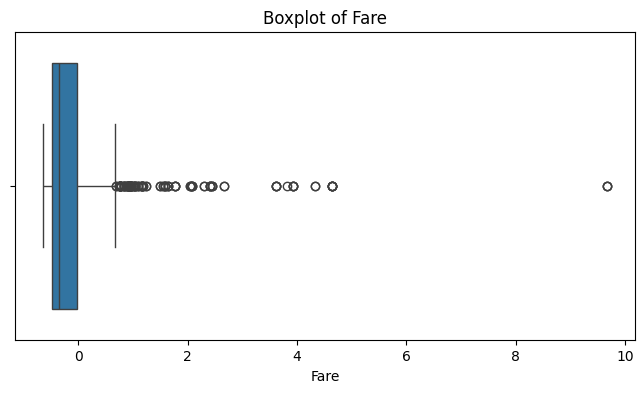

✅ Preprocessing Complete. Cleaned dataset saved as 'cleaned_titanic.csv'


In [10]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Dataset
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

# Step 3: Basic Info
print("Basic Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nStatistical Description:")
print(df.describe())

# Step 4: Handle Missing Values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop(columns=['Cabin'], inplace=True)

# Step 5: Encode Categorical Variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Step 6: Normalize/Standardize Numerical Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Step 7: Visualize Outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Fare'])
plt.title("Boxplot of Fare")
plt.show()

# Remove Outliers (Fare) using IQR method
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Fare'] < (Q1 - 1.5 * IQR)) | (df['Fare'] > (Q3 + 1.5 * IQR)))]

# Step 8: Save Cleaned Dataset
df.to_csv("cleaned_titanic.csv", index=False)

print("✅ Preprocessing Complete. Cleaned dataset saved as 'cleaned_titanic.csv'")
